In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = '201902-fordgobike-tripdata.csv'
df = pd.read_csv(data_path)

In [3]:
print(df.shape,"\n")
print(df.dtypes,"\n")
display(df.head(5))

(183412, 16) 

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object 



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# descriptive statistics for numeric variables
display(df.describe())

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# chek for duplicates
df.duplicated().sum()

# check for the percentage of missing values
missing_val_summary = (df.isnull().sum()/df.isnull().count())*100

display(missing_val_summary)

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

### What is the structure of your dataset?

> There are 183,412 rides made in the dataset with 16 features  (`'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip'`). Most variables are numeric in nature while some variables like the `start_time` and `end_time` have the wrong data types instead of the datetime.

> Also, the variables `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year` and  `member_gender` contained missing values with the following percentages:

>`start_station_id`:         0.107 <br>
`start_station_name`:        0.107 <br>
`end_station_id`:            0.107 <br>
`end_station_name`:          0.107 <br>
`member_birth_year`:         4.506 <br>
`member_gender`:             4.506 <br>

### What is/are the main feature(s) of interest in your dataset?

> Among several other informations that would warrant investigation along the data exploration, I am most interested in figuring out:
1. The time of day, day of the week that most trips are taken
2. How long does the average trip take?
3. If the answer in 1 & 2 above depend on if a user is a subscriber or a customer? 

> The main features of interest would be the `duration_sec`, `start_time`, and `user_type`. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> With Additional feature engineering from the main features of interest, I believe extracting the time of the day and day of the week from the start_time will help answer the number one objective listed above. It could also be expected that  the duration_sec would be able to help in answering the number two objective and then the user_type with the number three objective. Also features like `member_birth_year` and `member_gender` would greatly help support my investigations.

In [6]:
# make a copy of the original dataset to clean
df_new = df.copy()

In [7]:
# drop variables that are irrelevant to my analysis
df_new.drop(['end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id','end_station_latitude', 'end_station_longitude', 'bike_id', 
        'bike_share_for_all_trip'], axis=1, inplace=True)
df_new.head()

,duration_sec,start_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.7890,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.2180,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male


In [8]:
# assign proper data types to the start_time
df_new['start_time'] = pd.to_datetime(df_new['start_time'])

In [9]:
# extract day of the week
df_new['day_of_week'] = pd.DatetimeIndex(df_new['start_time']).strftime('%A')
# extract the time of the day
df_new['start_hour'] = df_new['start_time'].apply(lambda time: time.hour)
df_new['time_of_day'] = 'Morning'
df_new['time_of_day'][(df_new['start_hour'] >= 12) & (df_new['start_hour'] <= 17)] = 'Afternoon'
df_new['time_of_day'][(df_new['start_hour'] >= 18) & (df_new['start_hour'] <= 23)] = 'Night'

# display the added columns
display(df_new[['day_of_week','start_hour','time_of_day']])

,day_of_week,start_hour,time_of_day
0,Thursday,17,Afternoon
1,Thursday,18,Night
2,Thursday,12,Afternoon
3,Thursday,17,Afternoon
4,Thursday,23,Night
...,...,...,...
183407,Friday,0,Morning
183408,Friday,0,Morning
183409,Friday,0,Morning
183410,Friday,0,Morning


In [10]:
# display the resulting dataframe
display(df_new.head())

,duration_sec,start_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,Thursday,17,Afternoon
1,42521,2019-02-28 18:53:21.789,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,Thursday,18,Night
2,61854,2019-02-28 12:13:13.218,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,Thursday,17,Afternoon
4,1585,2019-02-28 23:54:18.549,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Thursday,23,Night


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of the main variables of interest: `day_of_week`, `time_of_day`, `user_type` and `duration_sec`

day_of_week
Thursday     35197
Tuesday      31813
Wednesday    29641
Friday       28981
Monday       26852
Sunday       15523
Saturday     15405
Name: count, dtype: int64

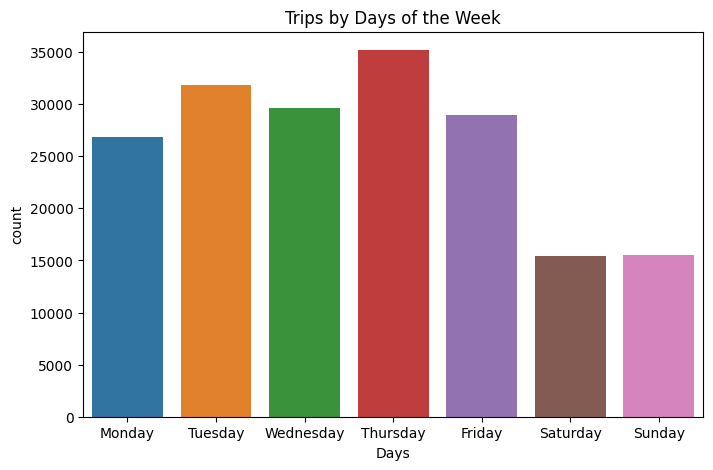

In [11]:
# Get the count of trips made in each day of the week
display(df_new['day_of_week'].value_counts().sort_values(ascending=False))
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plot distribution of day of week
plt.figure(figsize=[8, 5])

# base_color = sns.color_palette()[0]
sns.countplot(data = df_new, x = 'day_of_week', order=weekday)
plt.title('Trips by Days of the Week')
plt.xlabel('Days')
plt.show()

It happened that the day of the week with the most trips is **Thursday** followed by Tuesday and wednesday. It could be seen that Saturday and Sunday have the least number of trips which is quite reasonable with the fact that they are not working days. Therefore, I would be investigating how the user type and gender are distributed among the days of the week. 

The percentage count of trips made in terms of times of the day(%)
time_of_day
Afternoon    38.51
Morning      38.42
Night        23.07
Name: count, dtype: float64


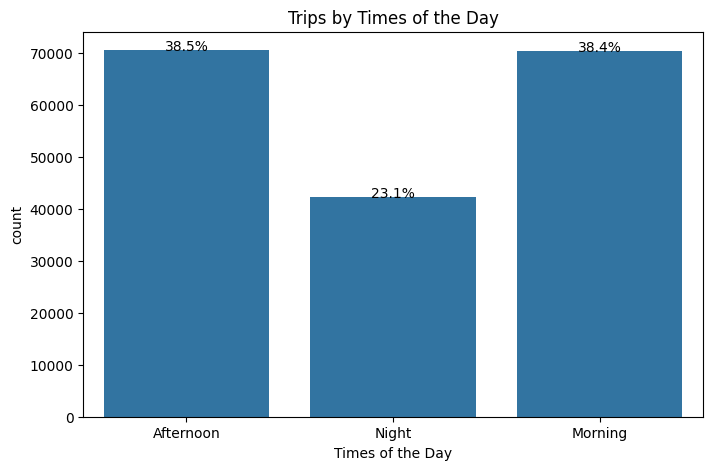

In [12]:
# Get the percentage count of trips made in terms of times of the day
time_of_day_count = (df_new['time_of_day'].value_counts()/df_new['time_of_day'].count())*100
print("The percentage count of trips made in terms of times of the day(%)")
print(time_of_day_count.round(2).sort_values(ascending=False))

# plot distribution of day of week
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = df_new, x = 'time_of_day', color = base_color)
n_points = df_new.shape[0]
user_counts = df_new['time_of_day'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')

plt.title('Trips by Times of the Day')
plt.xlabel('Times of the Day')
plt.show()

It could be seen from the plot that the time of the day with the most trips is **Afternoon** (12:00 - 17:59 hours of the day) followed by Morning (00:00 - 11:59 hours of the day). However, the differences between the number of trips taken in the two times is very little.This is really reasonable. Noone expects so much rides in the night time. Further analysis will be done to see if this is probably influenced by user types(subscriber and customer)

User Types Percentage Count (%)


user_type
Subscriber    89.17
Customer      10.83
Name: count, dtype: float64


Member Gender Percentage Count (%)


member_gender
Male      74.60
Female    23.32
Other      2.09
Name: count, dtype: float64

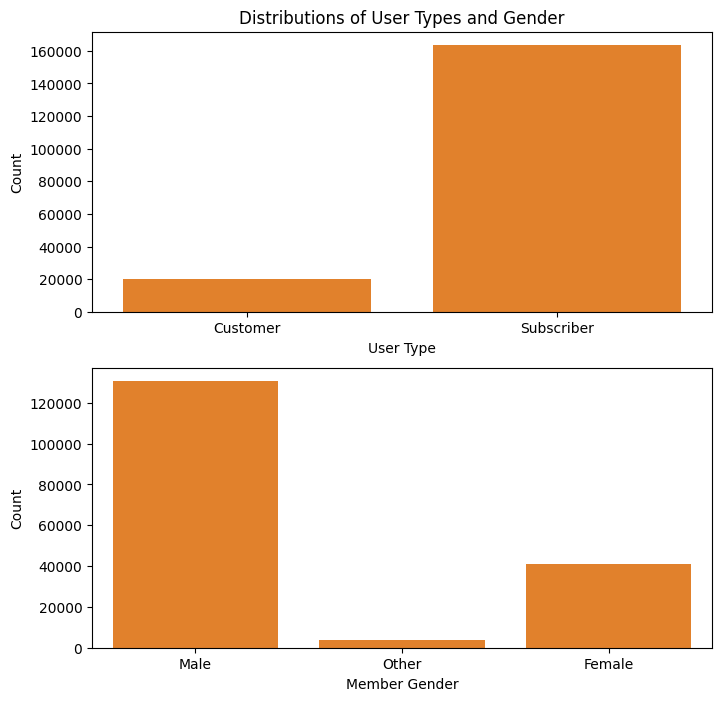

In [13]:
# Get the percentage count of user types and gender
user_type_count = (df_new['user_type'].value_counts()/df_new['user_type'].count())*100
member_gender_count = (df_new['member_gender'].value_counts()/df_new['member_gender'].count())*100

print("User Types Percentage Count (%)")
display(user_type_count.round(2).sort_values(ascending=False))
print("\nMember Gender Percentage Count (%)")
display(member_gender_count.round(2).sort_values(ascending=False))

# Attributes of the Riders: the distributions of user type and gender
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sns.color_palette()[1]
sns.countplot(data = df_new, x = 'user_type', color = default_color, ax = ax[0])
sns.countplot(data = df_new, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('Distributions of User Types and Gender');

- As it would be expected in most cases, most trips (about 90%) are taken by the **subscribers** with the remaining 10% being just casual riders. In the case of larger percentage of trips by subscribers; who wouldn't want to make efficient use of their subscription?. Or in another view, the Subscribers might be using the bikes for daily commute while customers just use it for leisure activities



-  Also, almost 75% of the riders that's taken trips are **males** which is like 3 times that of the females with the remaining 2% regarded as other.

Now unto the last main variables of interest: duration_sec

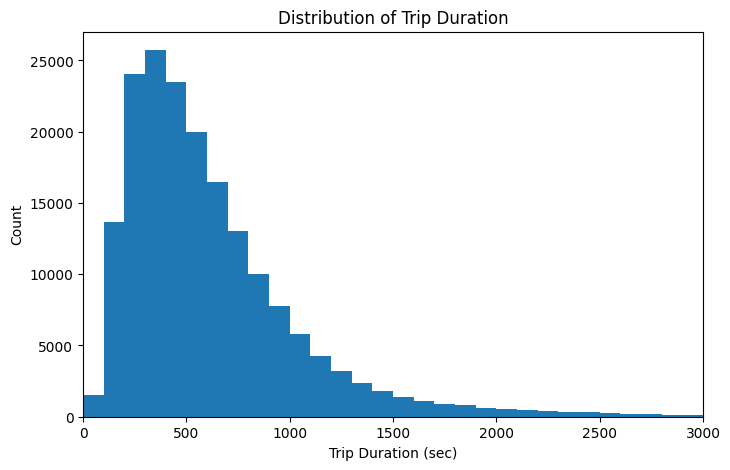

In [14]:
# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, df_new['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'duration_sec', bins=bins)
plt.xlim(0, 3000)
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')
plt.show()

The Trip duration in seconds distribution is highly right-skewed with a really long tail that it was very difficult to view the plot. I had to resolve into binning of size 100 and also set the plot's x_axis limit to 3000. I will change the trip duration variable to minute instead of second and also get to know how long the average trip take.

In [15]:
# standardizing the trip duration variable into minutes
df_new['duration_min'] = df_new['duration_sec'] / 60
# drop the 'duration_sec" column
df_new.drop('duration_sec' , axis = 1 , inplace = True)

# show
display(df_new[['duration_min']])

,duration_min
0,869.750000
1,708.683333
2,1030.900000
3,608.166667
4,26.416667
...,...
183407,8.000000
183408,5.216667
183409,2.350000
183410,2.316667


The time duration of average trip taken is 12.1 minutes.


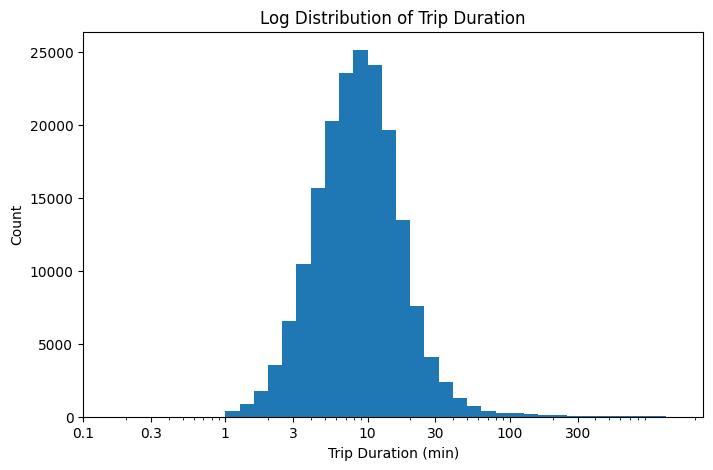

In [16]:
# print the average trip duration
average_trip_duration = np.round(df_new['duration_min'].mean(),2)
print("The time duration of average trip taken is %s minutes."%(average_trip_duration))

# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df_new['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df_new, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.ylabel('Count')
plt.title('Log Distribution of Trip Duration')
plt.show()

When the trip duration is converted to minutes and plotted on a log-scale, the duration distribution looks highly unimodal, with the peak around 10 minutes. Interestingly, the average trip duration is around 12 minutes. 


I'll now look at the other features in the data to see if any of them hold interesting properties: `start_hour`

The percentage count of trip starting hours (%)
start_hour
17    11.92
8     11.48
18     9.17
9      8.67
16     7.73
7      5.79
19     5.39
15     5.00
12     4.76
13     4.66
10     4.56
14     4.44
11     4.30
20     3.53
21     2.49
6      1.90
22     1.59
23     0.90
0      0.50
5      0.49
1      0.30
2      0.21
4      0.13
3      0.09
Name: count, dtype: float64


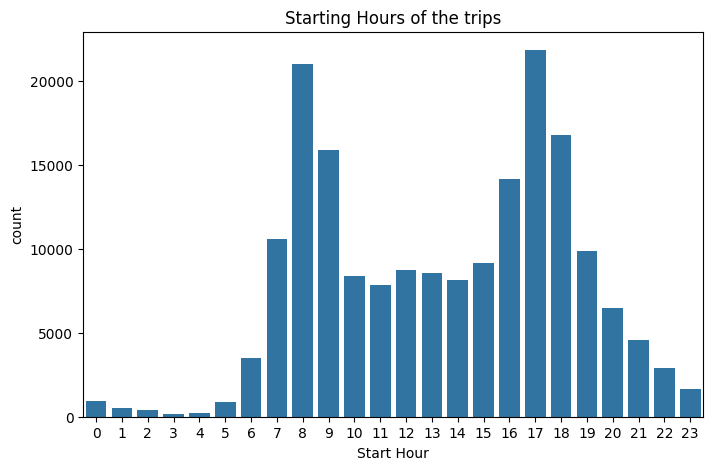

In [17]:
# Get the percentage count of trips made in terms of times of the day
start_hour_count = (df_new['start_hour'].value_counts()/df_new['start_hour'].count())*100
print("The percentage count of trip starting hours (%)")
print(start_hour_count.round(2).sort_values(ascending=False))

# plot distribution of day of week
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = df_new, x = 'start_hour', color = base_color)
plt.title('Starting Hours of the trips')
plt.xlabel('Start Hour')
plt.show()

From the above barchart, it could be seen that trips are started mostly between 8-9am and 5-6pm (17-18). This is highly justifiable as these hours correspond to the hours people leave for work and home respectively.

Before closing this section, I'll take a look at the age distribution of the riders

In [18]:
# create the age column taking the year 2019 as the current year
df_new['user_age'] = df_new['member_birth_year'].apply(lambda x: 2019 - x)
# drop the 'member_birth_year" column
df_new.drop('member_birth_year' , axis = 1 , inplace = True)
# test
display(df_new[['user_age']].head())

,user_age
0,35.0
1,NaN
2,47.0
3,30.0
4,45.0


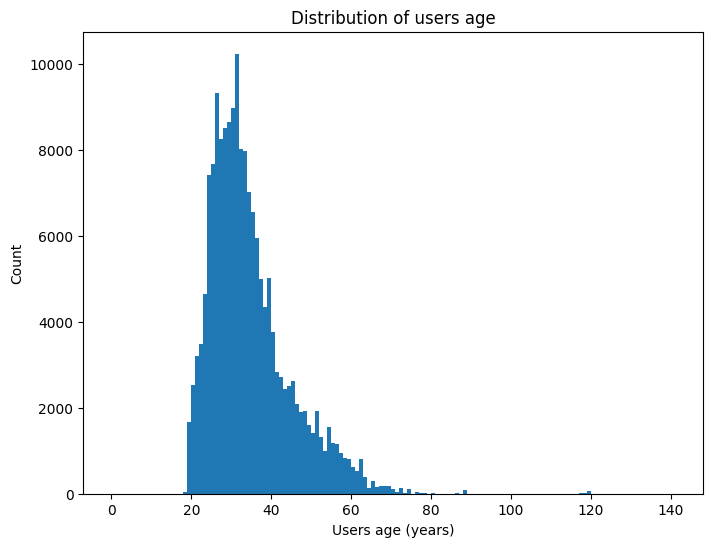

In [19]:
# start with a standard-scaled plot
binsize = 1
bins = np.arange(0, df_new['user_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_new, x = 'user_age', bins=bins)
plt.xlabel('Users age (years)')
plt.ylabel('Count')
plt.title('Distribution of users age')
plt.show()

The users age distribution is highly right-skewed with as well a quite long tail. i.e most users ages ranges between 18 and 60 while there are some suprisingly old agesranging from 80 to 140. There might have been an error in data input or it could just be a case of an exception in the general expectations. 
To have a better understanding of the distibution, I would bin the ages into groups to see how age ranges are distributed.

In [20]:
# create a new column user_age_bin from user_age group
max_age = str(int(df_new.user_age.max()))
df_new['user_age_bin'] = df_new['user_age'].apply(lambda x: '10 - 20' if 10<x<=20 else 
                                                  '21 - 30' if 20<x<=30 else
                                                  '31 - 40' if 30<x<=40 else 
                                                  '41 - 50' if 40<x<=50 else
                                                  '51 - 60' if 50<x<=60 else
                                                  '61 - 70' if 60<x<=70 else
                                                  '71 - 80' if 70<x<=80 else
                                                  '81 - '+max_age if 80<x<=float(max_age) else x)

# test
display(df_new[['user_age_bin']].head())

,user_age_bin
0,31 - 40
1,NaN
2,41 - 50
3,21 - 30
4,41 - 50


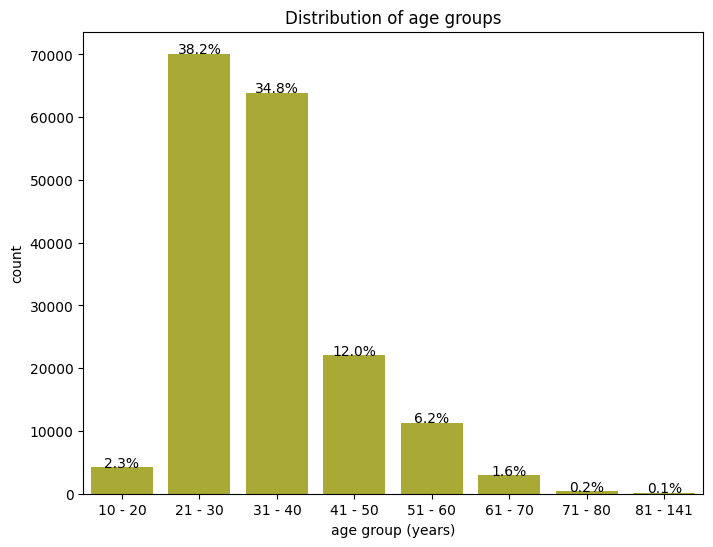

In [21]:
# plot distribution of day of week
plt.figure(figsize=[8, 6])
base_color = sns.color_palette()[8]
sns.countplot(data = df_new.sort_values(['user_age_bin']), x = 'user_age_bin', color = base_color)
n_points = df_new.shape[0]
user_counts = df_new['user_age_bin'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')

plt.title('Distribution of age groups')
plt.xlabel('age group (years)')
plt.ylabel("count")
plt.show()

Not less than 70% of the riders ranges from age 21 to 40. i.e people of age 21 - 40 took more rides compared to all other age groups. However, I would like to investigate further on the relationship between the age groups and the duration of trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables `duration_sec` and `user_age` (gotten from subtracting `member_birth_year` from the year the data was recorded - 2019) look very right skewed. To treat the duration_sec, I needed to convert the duration from second to minute and then used a log transform which then made the resulting distribution to be slightly unimodal with the peak around 10 minutes while the mean of the distribution was around 12 minutes. 
For the transformation of age, since the supposed outliers in the age distribution are realized to be valid years. I was able to bin/group the ages which resulted into a distribution with less skewness.

>I also checked variables like `user_type`, `member_genders` and so many other derived variables that are critical to understand the dataset and communicate the data findings. The following summarizes my findings in general:

 * The day of the week with the most trips is Thursday followed by Tuesday and wednesday. Most of the people take rides during Weekdays from Monday to Friday  compared to weekends
 * The time of the day with the most trips is Afternoon (12:00 - 17:59 hours of the day) followed by Morning (00:00 - 11:59 hours of the day)
 * Most trips (about 90%) are taken by the subscribers and would like to further investigate if this also influences the trip duration
 * Almost 75% of the riders that's taken trips are males which was like 3 times that of the females.
 * Trips are started mostly between 8-9am and 5-6pm (17-18)
 * Not less than 70% of the riders ranges from age 21 to 40, quite a youthful population, but could this relate to longer trip duration?


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The age distribution looked unusual, very old ages are present that seemed like outliers but I thought it was fair to let it be since they are valid. Data types of date related variables were also changed to the appropriate ones.
Also, feature engineering was performed to create features that are critical and important to my analysis. It was this feature engineering that gave birth to features like `'day_of_week', 'start_hour', 'time_of_day', 'duration_min', 'user_age'` and `'user_age_bin'`.
I as well dropped variables that aren't of interest in the dataset to tidy up the dataset for exploration.

## Bivariate Exploration

**To start off with, I want to look at the pairwise correlations present between features in the data.**

In [22]:
numeric_vars = ['start_hour', 'duration_min', 'user_age']
categoric_vars = ['user_type', 'member_gender', 'day_of_week', 'time_of_day']

<Axes: >

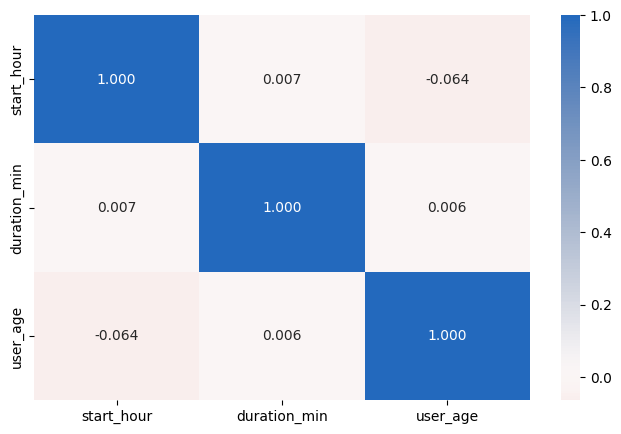

In [23]:
plt.figure(figsize=[8,5])
sns.heatmap(df_new[numeric_vars].corr(), annot= True, fmt = '.3f',cmap = 'vlag_r', center = 0)

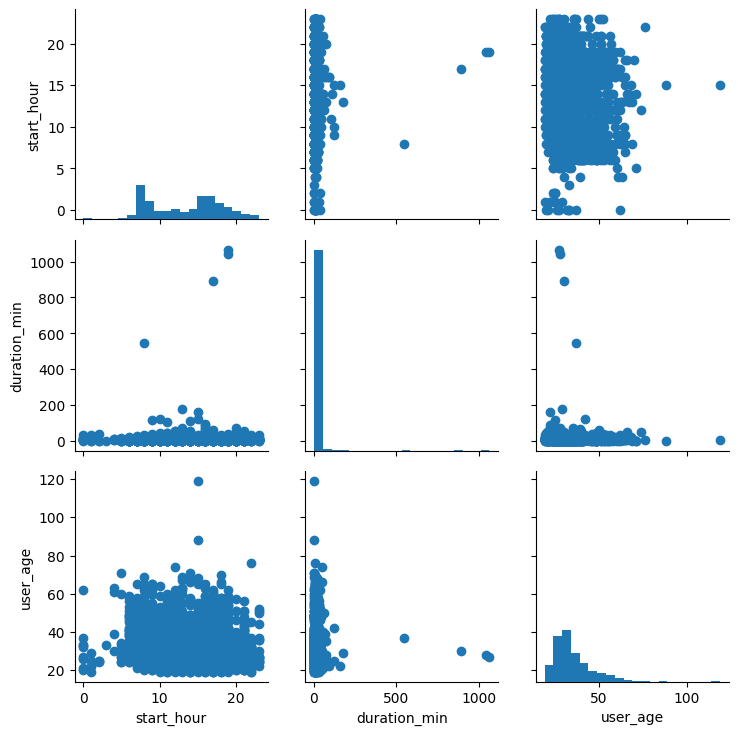

In [24]:
# plot matrix: sample 1834 trips so that plots are clearer and
# they render faster
samples = np.random.choice(df_new.shape[0], 1834, replace = False)
df_new_samp = df_new.loc[samples,:]

g = sns.PairGrid(data = df_new_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

Text(0, 0.5, 'trip duration (minute)')

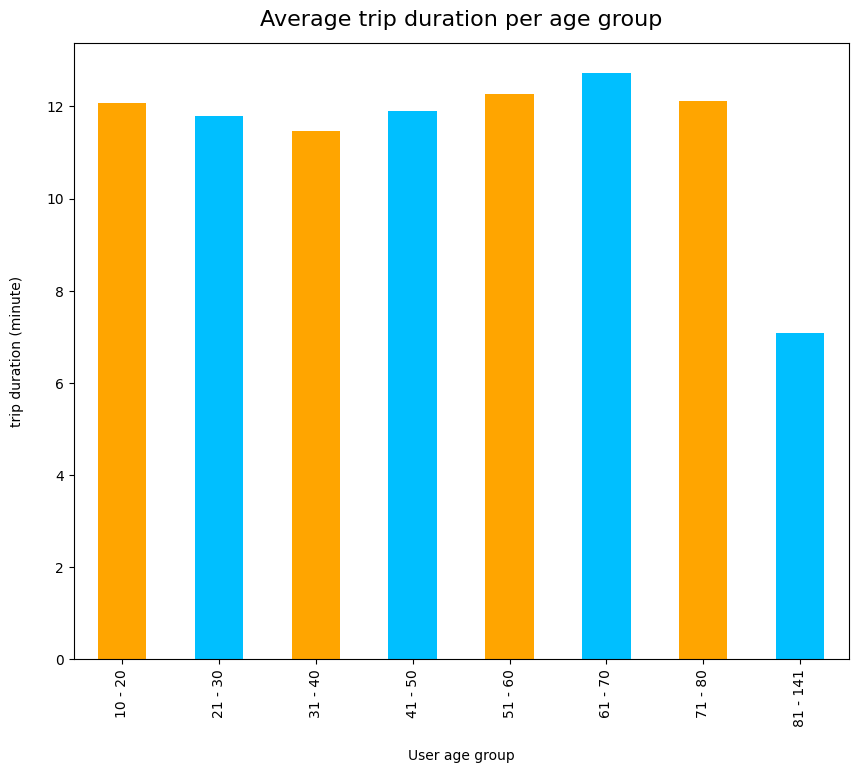

In [25]:
new_color=['orange', 'deepskyblue']
df_new.groupby('user_age_bin')['duration_min'].mean().plot(kind='bar', color=new_color, figsize=(10,8))
plt.title('Average trip duration per age group', fontsize=16, y=1.015)
plt.xlabel('User age group', labelpad=16)
plt.ylabel('trip duration (minute)', labelpad=16)

I expected that the young and youthful age groups should have the highest average trip duration because of the strength and agility they would possess but the graph above has proved me wrong. It could be compounded that, trips duration aren't based on how strong and agile the user is. It would however be better and right to say the trip duration is not affected by the user age not considering the extreme age groups (81-141).

<Figure size 1000x1000 with 0 Axes>

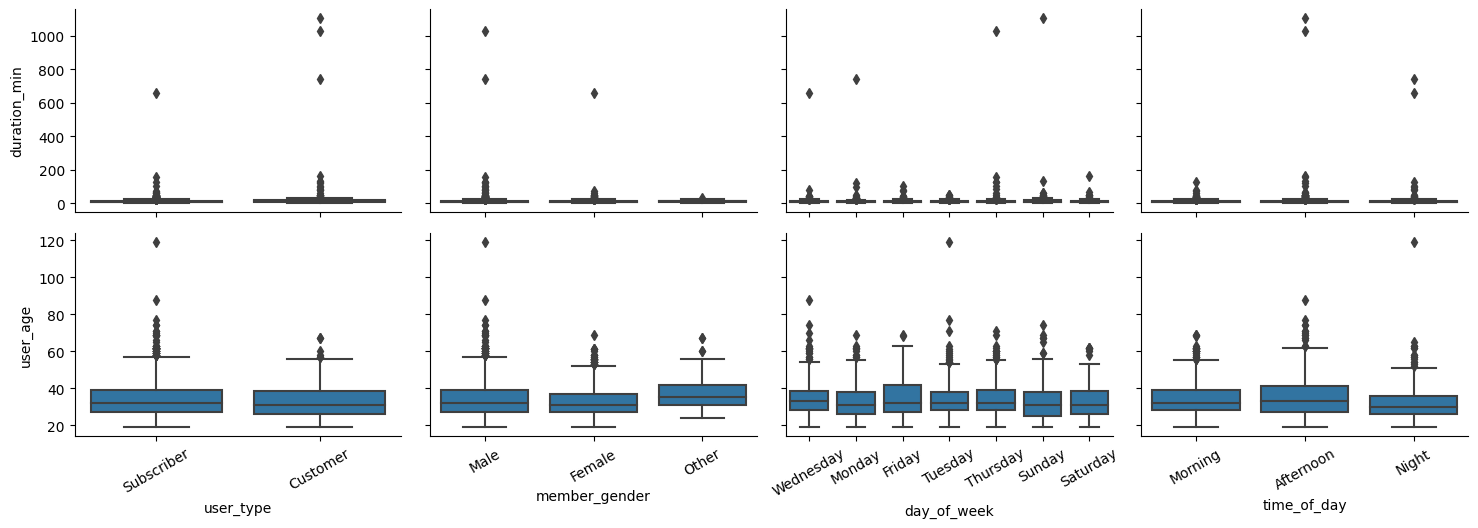

In [26]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_new.shape[0], 2000, replace = False)
df_new_samp = df_new.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color = default_color)
    plt.xticks(rotation = 30)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_new_samp, y_vars = ['duration_min', 'user_age'], x_vars = categoric_vars, aspect = 1.5)
g.map(boxgrid)
plt.show();

#### Does the day of the week that most trips are taken dependent on if a user is a subscriber or a customer?

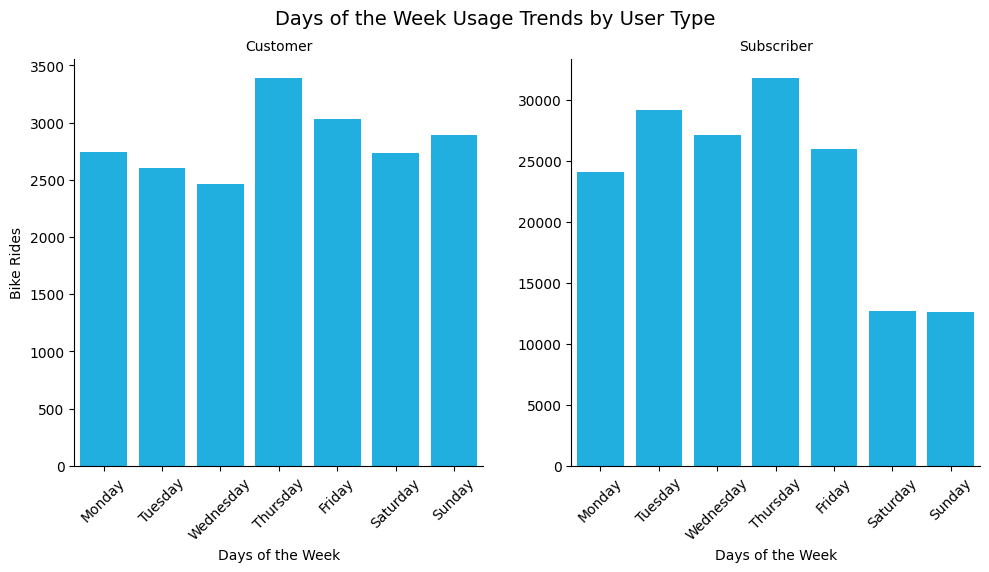

In [27]:
g = sns.catplot(data=df_new, x='day_of_week', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = weekday)
g.set_axis_labels("Days of the Week", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Days of the Week Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45)

From the above bar graph, the day of the week that most trips are taken (Thursday) is **NOT** dependent on if a user is a subscriber or a customer.
From the bar graphs, the trends shows that Customers often use the service during weekends where as Subscribers mostly use the service during regular weekdays from Monday to Friday. We could deduce from this that subscribers might be regularly using the bikes for work and home commute purposes and customers use it for recreational activities during weekends.

#### Does the time of the day that most trips are taken dependent on if a user is a subscriber or a customer?

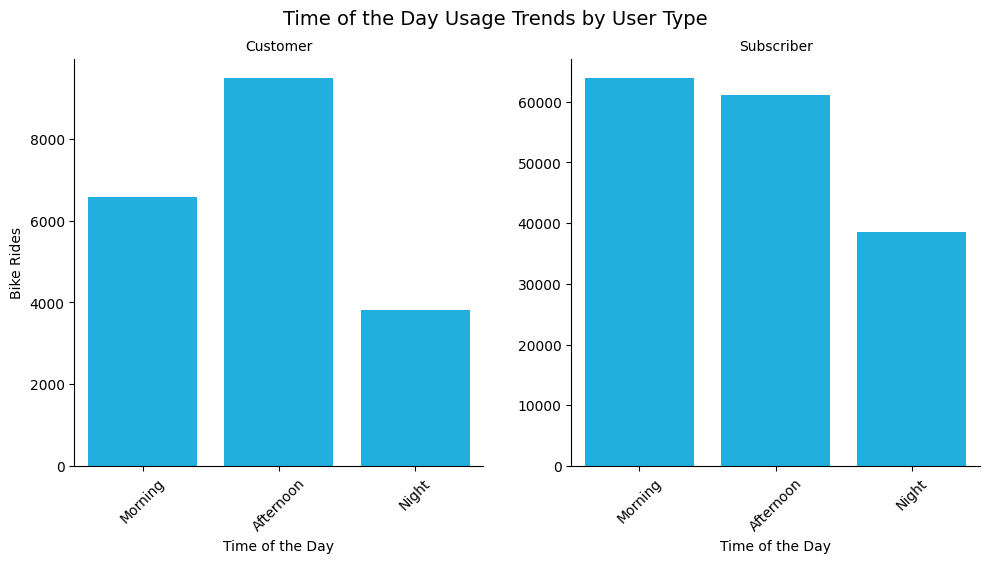

In [28]:
day_time = ['Morning', 'Afternoon', 'Night']
g = sns.catplot(data=df_new, x='time_of_day', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = day_time)
g.set_axis_labels("Time of the Day", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Time of the Day Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45)

From the above bar graph, the time of the day that most trips are taken (Afternoon and Morning) is slightly dependent on if a user is a subscriber or a customer. From the bar graphs, the trends shows that Customers often start the trip in the afternoon where as Subscribers mostly start the trip in the morning. This further proved that subscribers might be using the bikes for work and home commute purposes and customers use it for recreational activities.

#### Does the average trip duration taken dependent on if a user is a subscriber or a customer?

,user_type,duration_min
0,Customer,23.874417
1,Subscriber,10.671061


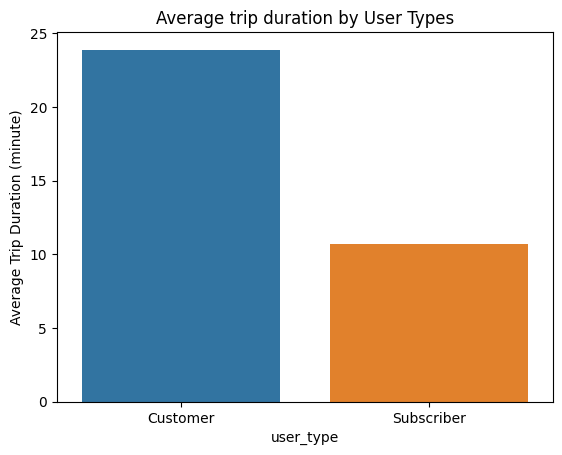

In [29]:
# Average trip duration mean plot
grouped_user_type_duration = df_new[['user_type','duration_min']].groupby(['user_type'],as_index= False).mean()
# show analysis
display(grouped_user_type_duration)

sns.barplot(x='user_type', y='duration_min', data=grouped_user_type_duration)
plt.title("Average trip duration by User Types")
plt.ylabel("Average Trip Duration (minute)")
plt.show()

Text(0.5, 1.0, 'Duration Against User Type')

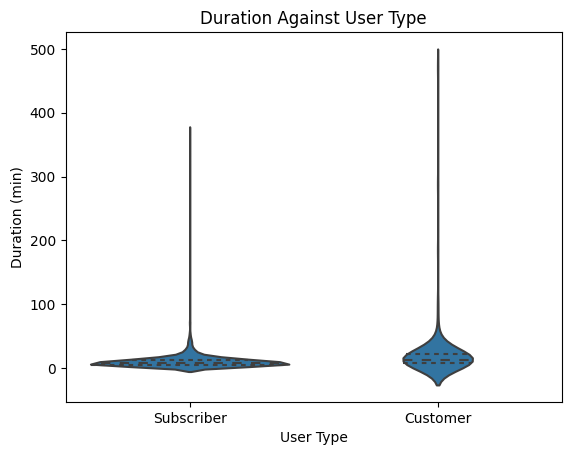

In [30]:
# plot relationship between user type and duration
samples = np.random.choice(df_new.shape[0], 1834, replace = False)
df_new_samp = df_new.loc[samples,:]
base_color = sns.color_palette()[0]
sns.violinplot(data=df_new_samp, x='user_type', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Type')

Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes - work and school, but the customer users might be tourists that use the bikes for traveling around town. The average trip duration **IS** highly dependent on if a user is a subscriber or just a customer. Customers have two times trip duration lenght of subscribers. 
Since Customers mostly go on trips by weekends, one would expect that average trip duration should then be the highest on wekends. This would be checked further for confirmation.

#### Average trip duration based on The Day of The Week: 

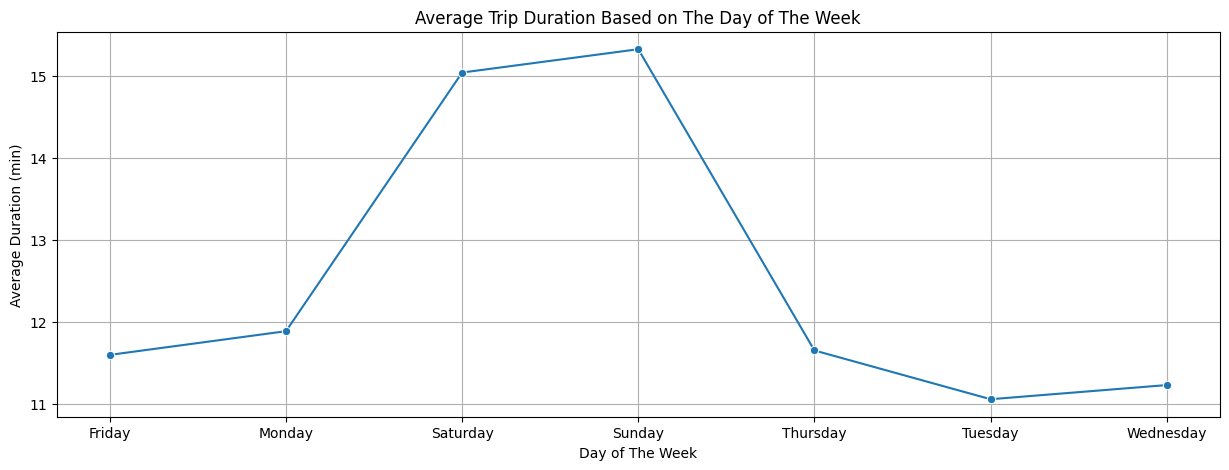

In [31]:
weekday_avg_min = df_new[['day_of_week','duration_min']].groupby(['day_of_week'],as_index= False).mean()
# plot a line plot
plt.figure(figsize=[15,5])
sns.lineplot(data=weekday_avg_min, x='day_of_week', y='duration_min',marker='o')
plt.ylabel('Average Duration (min)');
plt.xlabel('Day of The Week')
plt.grid()
plt.title('Average Trip Duration Based on The Day of The Week')
plt.show()

As expected, Saturdays and Sundays have the longest trip duration since the two days are majorly used by the customers.

Relationship between the user types and the trip starting hour

([<matplotlib.axis.XTick at 0x265d588cfd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

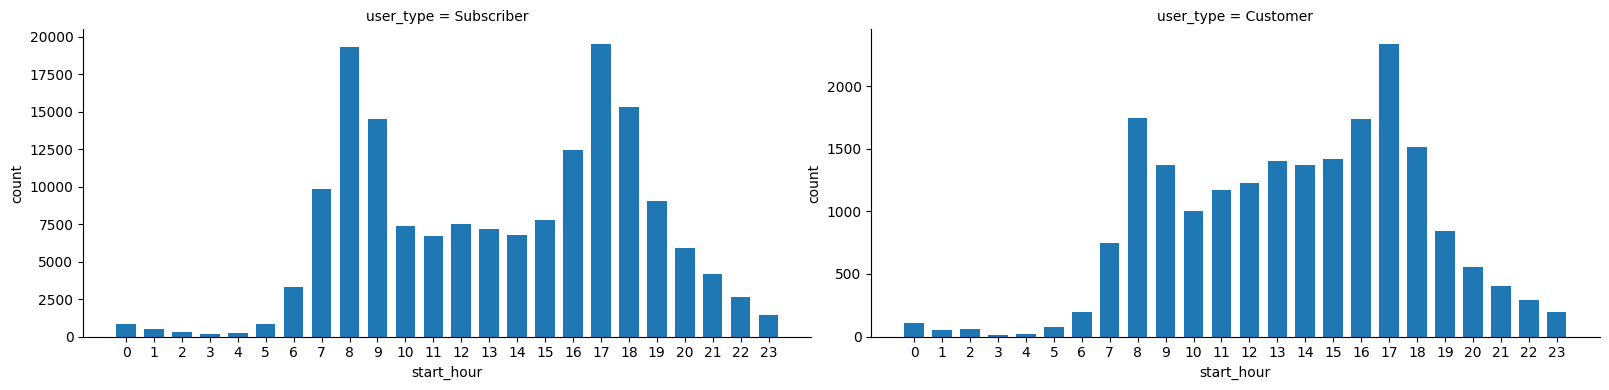

In [32]:
# facetting histograms of start_hour against user_type
user_cat_order = df_new['user_type'].value_counts().index
bin_edges = np.arange(-0.5, 23.5+1, 1)
g = sns.FacetGrid(data = df_new, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
g.map(plt.hist, 'start_hour', bins = bin_edges, rwidth = 0.7)
for ax in g.axes.flat:
    ax.set_ylabel('count')
plt.xticks(np.arange(0, 23+1, 1))

Most rides for subscribers started at 8 or 17. While most customer rides started at 17 or 18. This has just confirmed that subscribers could be using the bikes for daily commute while the customers just for leisure rides

#### Does the average trip duration taken dependent on if a user is a subscriber or a customer?

,member_gender,duration_min
0,Female,12.984506
1,Male,11.210651
2,Other,16.608589


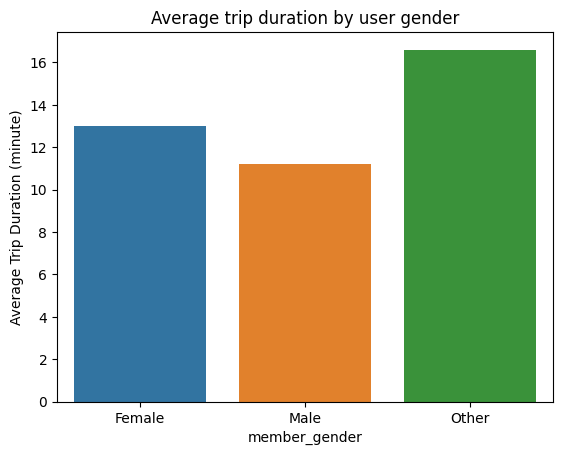

In [33]:
# Average trip duration mean plot
grouped_gender_type_duration = df_new[['member_gender','duration_min']].groupby(['member_gender'],as_index= False).mean()
# show analysis
display(grouped_gender_type_duration)

sns.barplot(x='member_gender', y='duration_min', data=grouped_gender_type_duration)
plt.title("Average trip duration by user gender")
plt.ylabel("Average Trip Duration (minute)")
plt.show()

Interestingly, eventhough the larger percentage of the users is male, the female tends to go on a longer ride compared to me. Unexpectedly, the "Other" type in gender has the highest trip duration on average. I wouldn't investigate this further as no information is known about the other gender.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Subscribers and customers bikes usage was different:
-  The day of the week that most trips are taken (Thursday) is NOT dependent on if a user is a subscriber or a customer. However, it was discovered that Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a huge increment on Saturday and Sunday
-  On average, Subscribers' trips mostly last for (10-11) minutes, while customers mostly last for (23-24) minutes.
-  Customers rides were more likely to last more than one hour compared to subscribers.
- Customers often start the trip in the afternoon where as Subscribers starts mostly in the morning followed by afternoon.
-  Most rides for subscribers started at 8 or 17. While most customer rides started at 17.

Average trip duration in minutes:
-  On average, rides on the weekend (Saturday and Sunday) lasted longer than the other days.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

-  The user gender named "other" had the highest ride duration, followed by the female with the male having the least trip duration. 

## Multivariate Exploration

#### Daily average trip duration for each user_type

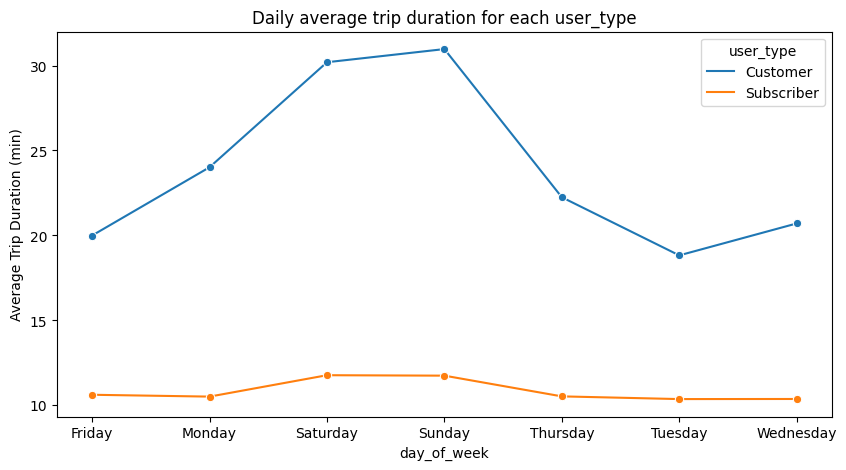

In [34]:
user_weekday_avg_min = df_new.groupby(['user_type','day_of_week']).duration_min.mean()
user_weekday_avg_min = user_weekday_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_weekday_avg_min, x='day_of_week', y='duration_min', hue='user_type', marker='o')
plt.title("Daily average trip duration for each user_type")
plt.ylabel('Average Trip Duration (min)');

On average,  customers rides lasted longer than subscribers rides on every day of the week.

Time of the day average trip duration for each user_type

#### Time of the day average trip duration for each user_type

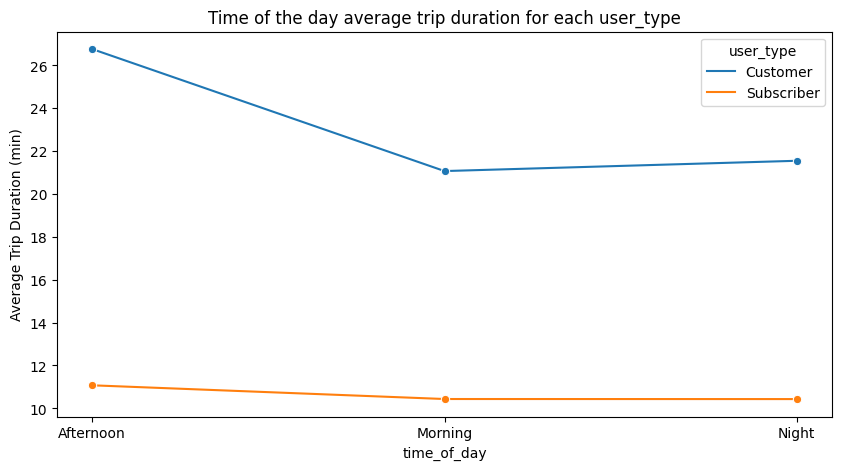

In [35]:
user_daytime_avg_min = df_new.groupby(['user_type','time_of_day']).duration_min.mean()
user_daytime_avg_min = user_daytime_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_daytime_avg_min, x='time_of_day', y='duration_min', hue='user_type', marker='o')
plt.title("Time of the day average trip duration for each user_type")
plt.ylabel('Average Trip Duration (min)');

It could be seen that the plots maintained a slighly constant trip durations for both the morning and night time for the two user types groups while there is a huge rise/increase in the average trip for the customers in the afternoon. This is because, customers mostly start their trip during the afternoon time.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of the dependency of the user_type on the average trip duration, days of the week and the time of the day in this section by looking at the relationship between the features. The multivariate exploration here showed that there indeed is a dependency of the average trip duration on if a user is a subscriber or a customer. On average, customers rides lasted longer than subscribers rides on every day of the week and time of the day.

### Were there any interesting or surprising interactions between features?

> Not did I discover. Maybe I should have explored more, but then, I feel satisfied with the findings so far.